# Project Business Statistics: E-news Express


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Import all the necessary libraries

In [142]:
# Installing the libraries 
#!pip install numpy pandas matplotlib seaborn scipy

#### Read and Understand the data

In [143]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
# reading the data
data = pd.read_csv("abtest.csv")

In [145]:
# Make a copy of df
df = data.copy()

In [146]:
# view first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [147]:
# view last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [148]:
# shape of the data
df.shape

(100, 6)

- Dataset contains 100 rows and 6 columns.

In [149]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- Dataset contains 100 records.
- The dataset contains three types of data.
  1. Integer for the user_id
  2. Float for the time_spent_on_the_page
  3. Object for group, landing_page, converted, language_preferred
- No missing values are present in any column, as all columns have 100 non-null values.
- The dataset occupies approximately 4.8 KB of memory.

In [150]:
# to get the statistical summay of the data
# df.describe()

## To inlcude categorical data also, we can use inlcude = 'all' parameter
df.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [151]:
# to check for null values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- No null values in the dataset.

In [152]:
# check for duplicate records
df.duplicated().sum()

np.int64(0)

- There are no duplicate records in the dataset.

### Exploratory Data Analysis (EDA)

Let’s write reusable code for common plots used in EDA, which makes maintenance easier and allows quick application of the logic to multiple features.

In [153]:
# This function generates count plots for categorical variables. 
# It helps in understanding the distribution of categories and identifying class imbalance in the dataset.

def countplot_func(data, column):
    sns.countplot(data=data, x=column)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [154]:
# This function uses value_counts() to provide a quick summary of unique values in a categorical column. 
# It's useful for gaining insight into category frequency before visualizing.

def value_counts_summary(data,column):
    vc = data[column].value_counts(dropna=False)
    pct = data[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': vc, 'Percent': pct.round(2)})
    return summary

In [155]:
# This function plots histograms to understand the frequency distribution of a numeric variable. 
# It's useful for assessing data skewness, modality, and identifying common value ranges.

def histplot_func(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.show()

In [156]:
# This function creates a box plot to visualize the distribution and detect potential outliers in the data.  
# It helps in identifying the spread, central tendency, and presence of extreme values in numerical features.

def boxplot_func(data, column):
    sns.boxplot(data=data, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Univariate Analysis

In [157]:
# user_id
df['user_id'].count()

np.int64(100)

- user_id is unique id for each record in the dataset.

In [158]:
# group
value_counts_summary(df,'group')

,Count,Percent
group,,
control,50,50.0
treatment,50,50.0


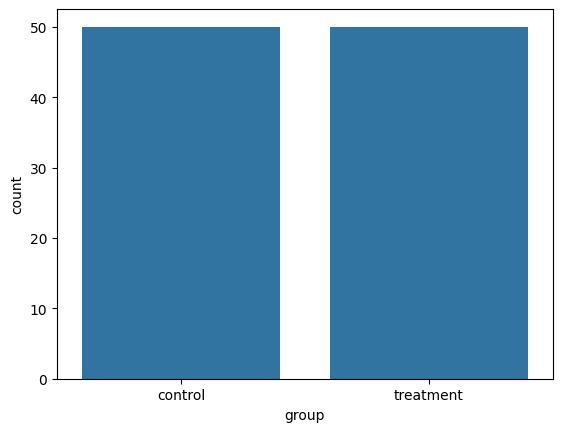

In [159]:
sns.countplot(data = df, x = 'group');

- There are equal numbers of users in the control and treatment groups, each with 50 users.

,Count,Percent
landing_page,,
old,50,50.0
new,50,50.0


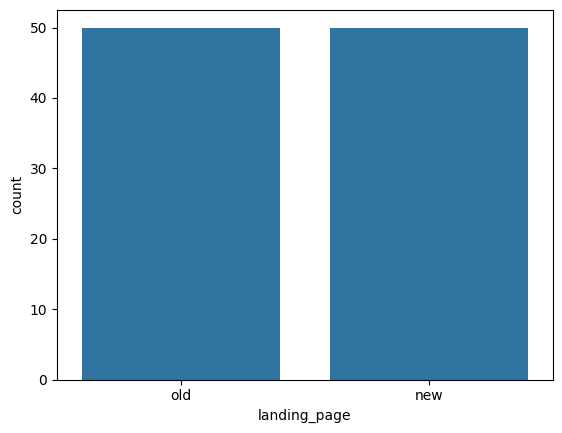

In [160]:
# landing_page
sns.countplot(df, x = 'landing_page');

value_counts_summary(df,'landing_page')

- The dataset contains two types of landing pages: 'old' and 'new'. Half of the users saw the new landing page, and half saw the old one.

#### time_spent_on_the_page

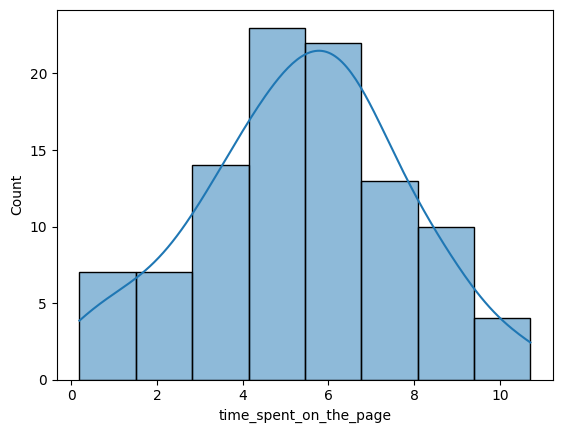

In [161]:
# understanding time_spent_on_the_page feature.

# plotting time_spent_on_the_page
sns.histplot(data = df, x = 'time_spent_on_the_page', kde = True);

In [162]:
# statistical summary of the time_spent_on_the_page feature.
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

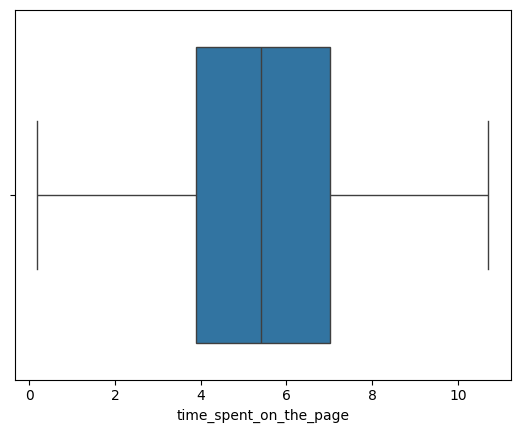

In [163]:
# checking for any outliers 
sns.boxplot(data = df, x = 'time_spent_on_the_page');

- The box plot shows that there are no apparent outliers, suggesting that the data is fairly consistent without extreme values.
- The mean time spent on the page is approximately 5.38 minutes.
- The median (50th percentile) time spent on the page is 5.42 minutes, which is very close to the mean, suggesting a relatively symmetric distribution.
- The minimum time spent is 0.19 minutes, while the maximum time spent is 10.71 minutes, showing a wide range of time spent by users on the page.

#### converted

In [164]:
# understanding converted feature.
df['converted'].value_counts()


# we can use normalize = True parameter to understand the fraction
#df['converted'].value_counts(normalize = True)

converted
yes    54
no     46
Name: count, dtype: int64

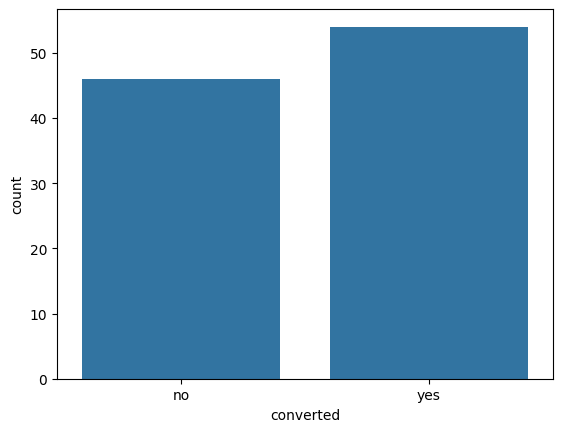

In [165]:
sns.countplot(data = df, x = 'converted');

- There are two categories in the converted column: 'yes' and 'no'. More users (54) converted to subscribers than those who did not (46).

#### language_preferred

In [166]:
# understanding language_preferred feature
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

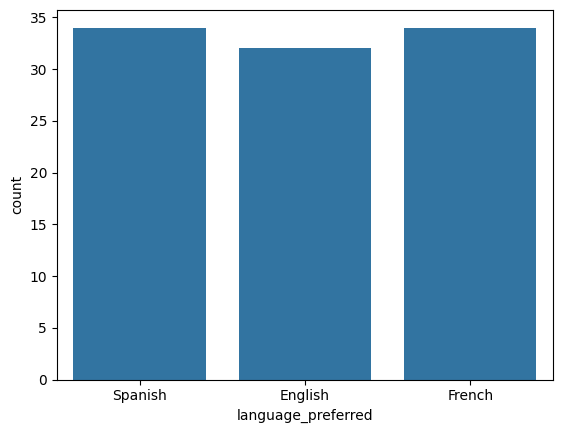

In [167]:
sns.countplot(data = df, x = 'language_preferred');

- There are 3 kinds of languages preferred by users: 'Spanish', 'English', 'French'.
- The most preferred languages are Spanish and French, with 34 users choosing it.

### Bivariate Analysis

#### Conversion Rate vs. Preferred Language

In [168]:
conversion_rate = df.groupby("language_preferred")["converted"].value_counts(normalize=True).unstack()
conversion_rate

converted,no,yes
language_preferred,,
English,0.343750,0.656250
French,0.558824,0.441176
Spanish,0.470588,0.529412


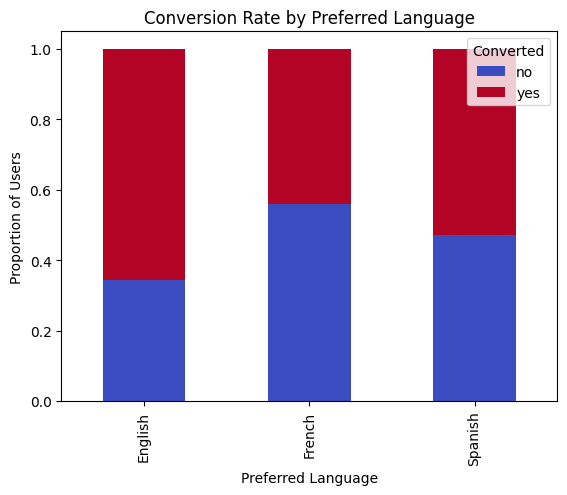

In [169]:
conversion_rate.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Conversion Rate by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Proportion of Users")
plt.legend(title="Converted")
plt.show()

- English speakers have the highest conversion rate (65.63%). They are more likely to subscribe compared to users of other languages.
- French speakers have the lowest conversion rate (44.12%). Spanish speakers fall in between (52.94%), showing a moderate conversion rate.

#### Landing Page vs. Time Spent on page

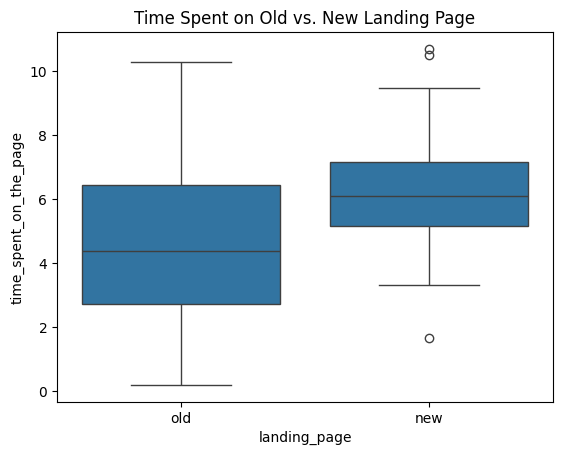

In [170]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title("Time Spent on Old vs. New Landing Page")
plt.show()

In [171]:
# calculate summary statistics 
summary_stats = df.groupby('landing_page')['time_spent_on_the_page'].describe()

summary_stats

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


- Users generally spent more time on the new landing page (mean of 6.22 minutes) compared to the old one (mean of 4.53 minutes).
- The time spent on the new landing page shows less variability (standard deviation of 1.82 minutes) than the old landing page (2.58 minutes), suggesting more consistent user engagement with the new design.
- Both pages have similar maximum time values, indicating that some users are highly engaged on both platforms.

#### Converted vs Time spent on the page

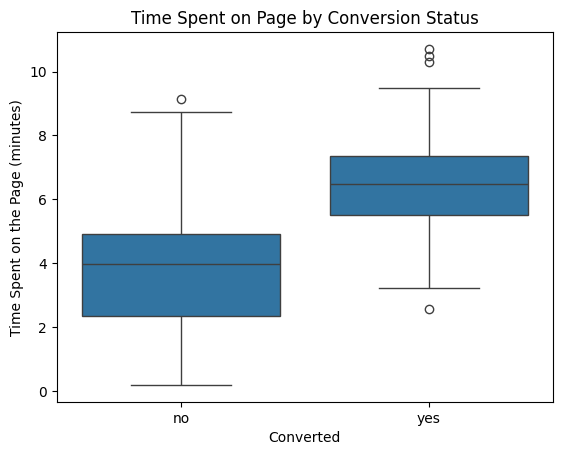

In [172]:
sns.boxplot(x='converted', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on Page by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

In [173]:
# Summary statistics for time spent by conversion status
converted_group = df[df['converted'] == 'yes']['time_spent_on_the_page']
non_converted_group = df[df['converted'] == 'no']['time_spent_on_the_page']

print("Converted Users - Time Spent: Mean =", converted_group.mean())
print("Non-Converted Users - Time Spent: Mean = ", non_converted_group.mean())


Converted Users - Time Spent: Mean = 6.6231481481481485
Non-Converted Users - Time Spent: Mean =  3.915869565217392


- Time spent by converted users is significantly higher than that of non-converted users. On average, converted users spend more time about 6.62 minutes compared to non-converted users about 3.92 minutes.

### 1. Do the users spend more time on the new landing page than the existing landing page?

#### Performing Visual Analysis

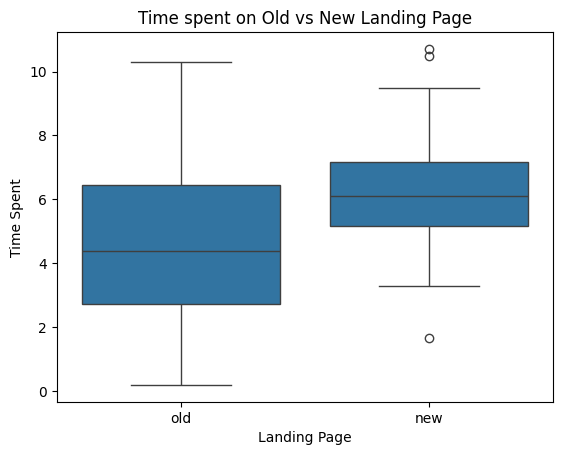

In [174]:
# time spent on old vs new landing page.
sns.boxplot(x=df['landing_page'], y=df['time_spent_on_the_page'])
plt.title("Time spent on Old vs New Landing Page")
plt.xlabel("Landing Page")
plt.ylabel("Time Spent")
plt.show()

#### Step 1: Define the null and alternate hypotheses

$H_0: \mu_{new} \le \mu_{old}$ (The mean time spent on the new page is less than or equal to the old page).

$H_a: \mu_{new} > \mu_{old}$ (The mean time spent on the new page is greater than the old page).                  

#### Step 2: Select Appropriate test

Since we are comparing the means of two independent groups (new vs old landing page) and the population standard deviations are unknown, the appropriate test to use is the two-sample independent t-test (one-tailed).

#### Step 3: Decide the significance level

We set $\alpha$ = 0.05 (5% significance level)

#### Step 4: Collect and prepare data

In [175]:
# prepare data
old_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']

#### Step 5: Calculate the p-value

In [176]:
# Import ttest_ind 
from scipy.stats import ttest_ind

# Perform t-test (one-tailed: alternative='greater')
t_stat, p_value = ttest_ind(new_time, old_time, alternative='greater')

print("T-statistic:", round(t_stat,4))
print("P-value:", round(p_value,4))

T-statistic: 3.7868
P-value: 0.0001


#### Step 6: Compare the p-value with $\alpha$

In [177]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Users spend more time on the new landing page.")
else:
    print("Fail to reject H₀: No significant difference in time spent.")

Reject H₀: Users spend more time on the new landing page.


#### Step 7:  Draw inference

We reject the null hypothesis. . We have sufficient statistical evidence to conclude that users spend more time on the new landing page than on the existing landing page. 

### 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Perform Visual Analysis

In [178]:
conversion_counts = df.groupby('landing_page')['converted'].value_counts()
conversion_counts

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

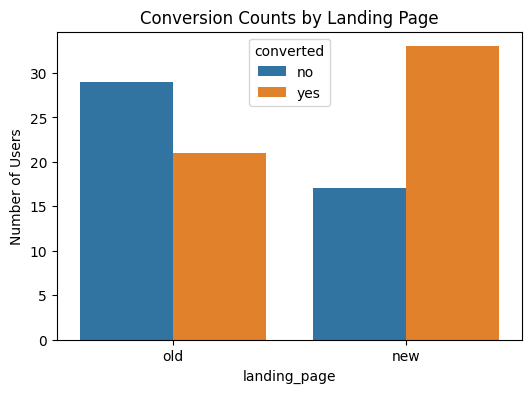

In [179]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='landing_page', hue='converted')
plt.ylabel("Number of Users")
plt.title("Conversion Counts by Landing Page")
plt.show()

#### Step 1: Define the null and alternate hypotheses

$H_0: p_{new} \le p_{old}$ (The conversion rate for the new landing page is less than or equal to the conversion rate for the old landing page)

$H_a: p_{new} > p_{old}$ (The conversion rate for the new landing page is greater than the conversion rate for the old landing page)

#### Step 2: Select Appropriate test

Since we are comparing proportions (conversion rates) of two independent groups, we use a two-sample proportions z-test.

#### Step 3: Decide the significance level

We set $\alpha$ = 0.05 (5% significance level)

#### Step 4: Collect and prepare data

In [180]:
# Count conversions for each landing page
converted_new = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
converted_old = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

# Total users for each landing page
total_new = df[df['landing_page'] == 'new'].shape[0]
total_old = df[df['landing_page'] == 'old'].shape[0]

#### Step 5: Calculate the p-value

In [181]:
# Perform the z-test
from statsmodels.stats.proportion import proportions_ztest

count = np.array([converted_new, converted_old])
nobs = np.array([total_new, total_old])
stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print("P-value: ", p_value)

P-value:  0.008026308204056278


#### Step 6: Compare the p-value with $\alpha$

In [182]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: The new landing page has a higher conversion rate.")
else:
    print("Fail to reject H₀: No significant evidence that the new page has a higher conversion rate.")

Reject H₀: The new landing page has a higher conversion rate.


#### Step 7:  Draw inference

Since the p-value (0.008) is less than the significance level α = 0.05, we reject the null hypothesis. This means that there is strong statistical evidence to conclude that the new landing page has a higher conversion rate compared to the old landing page.

Thus, the new landing page is more effective in converting visitors into subscribers.

### 3. Is the conversion and preferred language are independent or related?

#### Perform Visual Analysis

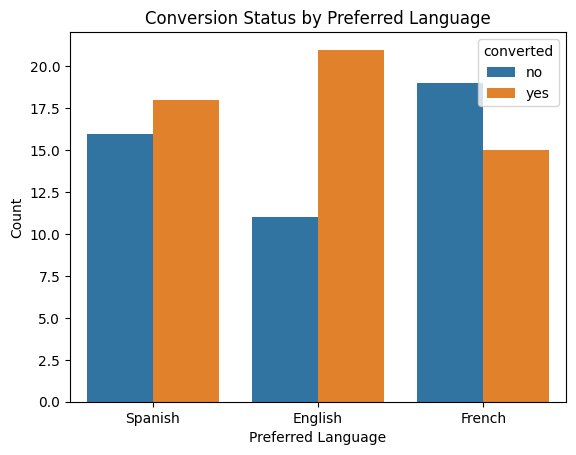

In [183]:
# Countplot for conversion status across different languages
sns.countplot(data=df, x="language_preferred", hue="converted")
plt.xlabel("Preferred Language")
plt.ylabel("Count")
plt.title("Conversion Status by Preferred Language")
plt.show()

#### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion and preferred language are independent. (There is no relationship between the language a user prefers and whether they convert)
 
$H_a:$ Conversion and preferred language are related. (There is a statistically significant relationship between the two variables)

#### Step 2: Select Appropriate test

Since both variables are categorical, we use the Chi-Square Test of Independence.

#### Step 3: Decide the significance level

We set = 0.05 (5% significance level)

#### Step 4: Collect and prepare data

In [184]:
# Creating a contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#### Step 5: Calculate the p-value

In [185]:
# Perform Chi-Square test
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p_value)

P-value: 0.21298887487543447


#### Step 6: Compare the p-value with $\alpha$

In [186]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Conversion and preferred language are related.")
else:
    print("Fail to reject H₀: Conversion and preferred language are independent.")

Fail to reject H₀: Conversion and preferred language are independent.


#### Step 7: Draw inference

Since the p-value (0.213) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis. This means there is no significant relationship between a user's preferred language and whether they convert or not.

### 4. Is the time spent on the new page same for the different language users?

#### Perform Visual Analysis

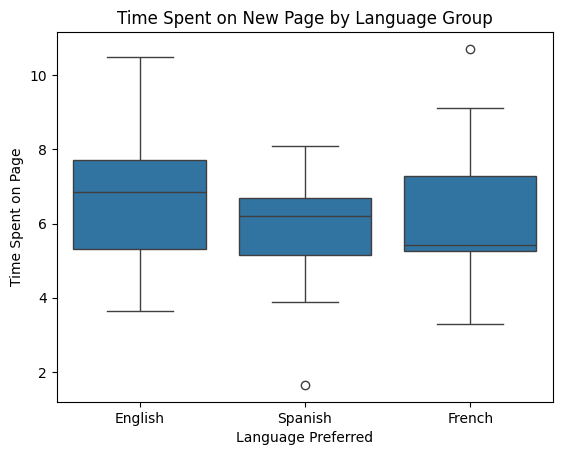

In [187]:
# plot to visualize time spent for different languages
sns.boxplot(data = df[df['landing_page'] == 'new'], x='language_preferred', y='time_spent_on_the_page')
plt.title("Time Spent on New Page by Language Group")
plt.xlabel("Language Preferred")
plt.ylabel("Time Spent on Page")
plt.show()

#### Step 1: Define the null and alternate hypotheses

$H_0: \mu_{English} = \mu_{French} = \mu_{Spanish}$ (The mean time spent on the new page is the same for all preferred language groups).

$H_a:$ The mean time spent on the new landing page is different for at least one language group.

#### Step 2: Select Appropriate test

Since we are comparing the means of more than two independent groups (language categories), we use the ANOVA test.

#### Step 3: Decide the significance level

We set = 0.05 (5% significance level)

#### Step 4: Collect and prepare data

In [188]:
# Filter data for users who saw the new landing page
new_page_data = df[df['landing_page'] == 'new']

#### Step 5: Calculate the p-value

In [189]:
# Perform ANOVA test
from scipy import stats

f_stat, p_value = stats.f_oneway(new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page'], new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page'], new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page'])

print("P-value:", p_value)

P-value: 0.43204138694325955


#### Step 6: Compare the p-value with $\alpha$

In [190]:
if p_value < 0.05:
    print("Reject H₀: The time spent on the new page is NOT the same for different language users.")
else:
    print("Fail to Reject H₀: The time spent on the new page is the same across different language users.")

Fail to Reject H₀: The time spent on the new page is the same across different language users.


#### Step 7: Draw inference

Since the p-value (0.432) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means that there is no significant difference in the average time spent on the new landing page among users of different preferred languages.

### Conclusion and Business Recommendations

#### Conclusion - 
- Users spend more time on the new landing page than on the existing one.
- The new landing page has a higher conversion rate compared to the old page.
- There is no significant relationship between a user's preferred language and their conversion status.
- Time spent on the new landing page does not significantly differ among users of different preferred languages.

#### Recommendations - 
- Implement the new landing page to enhance user engagement and increase subscriptions.
- Prioritize a seamless user experience by ensuring content is easily accessible and navigation is intuitive. 
- Utilize  feedbacks to understand user behavior and identify areas for improvement.  
- Incorporate high-quality visuals, videos, and infographics to make content more engaging and easily digestible.
- Allow users to share articles on social media platforms to increase visibility and drive traffic.